In [31]:
dataset = "unemp_h1"

In [2]:
from MRF import *
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [54]:
data_in = pd.read_csv(f"/Users/ryanlucas/Desktop/MacroRandomForest/Datasets/{dataset}.csv", index_col=[0])

In [55]:
data_in = data_in.reset_index(drop = True)

In [56]:
data_in.insert(0, "UNRATE", data_in['L0_UNRATE'])

In [57]:
data_in = data_in.iloc[:, :100]

In [58]:
data_in.to_csv("/Users/ryanlucas/Desktop/MacroRandomForest/Datasets/UNRATE.csv")

In [59]:
data_in

,UNRATE,y,L_0y,L_1y,L_2y,L_3y,L_4y,L_5y,L_6y,L_7y,...,L0_USINFO,L0_USPBS,L0_USLAH,L0_USSERV,L0_USMINE,L0_USTPU,L0_USGOVT,L0_USTRADE,L0_USWTRADE,L0_CES9092000001
0,-0.2333,0.019421,0.019014,0.016832,0.006728,-0.012917,0.004881,-0.005408,0.022224,0.002846,...,0.008286,0.011010,0.006164,0.012367,0.005036,0.004604,0.011595,0.005454,0.005556,0.011173
1,-0.5667,0.017679,0.019421,0.019014,0.016832,0.006728,-0.012917,0.004881,-0.005408,0.022224,...,0.006267,0.010191,0.006603,0.012491,-0.006873,0.003409,0.006409,0.004781,0.002748,0.002671
2,-0.5667,0.008996,0.017679,0.019421,0.019014,0.016832,0.006728,-0.012917,0.004881,-0.005408,...,0.005452,0.010001,0.007034,0.012065,-0.005995,0.005346,0.006669,0.006134,0.008977,0.005730
3,-0.1000,0.012210,0.008996,0.017679,0.019421,0.019014,0.016832,0.006728,-0.012917,0.004881,...,0.004649,0.010245,0.010271,0.012190,-0.010695,0.007669,0.009344,0.008626,0.007745,0.015187
4,0.0334,0.003283,0.012210,0.008996,0.017679,0.019421,0.019014,0.016832,0.006728,-0.012917,...,-0.001547,0.006999,0.003182,0.010446,-0.012703,-0.000297,0.011025,0.002265,0.003453,0.012581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,-0.3000,0.007951,0.007804,0.001233,0.008818,0.001138,0.001349,0.004293,0.007799,0.011526,...,0.000370,0.006543,0.008346,0.004501,0.003863,0.005755,-0.001404,0.008035,0.003674,-0.000926
209,-0.3000,-0.002521,0.007951,0.007804,0.001233,0.008818,0.001138,0.001349,0.004293,0.007799,...,0.006386,0.006341,0.007584,0.004118,0.004232,0.006132,0.000183,0.006904,0.001445,0.003038
210,-0.2666,0.012461,-0.002521,0.007951,0.007804,0.001233,0.008818,0.001138,0.001349,0.004293,...,-0.000490,0.006318,0.006471,0.004462,0.007648,0.003225,-0.000321,0.001277,0.005076,-0.000132
211,-0.4667,0.012017,0.012461,-0.002521,0.007951,0.007804,0.001233,0.008818,0.001138,0.001349,...,0.000122,0.008275,0.009482,0.004382,0.015123,0.005847,0.001648,0.004862,0.004951,0.000000


In [60]:
oos_pos = np.arange(data_in.index[-50], data_in.index[-1]+1)
# oos_pos = np.arange(150, 200)

print(oos_pos)

[163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212]


In [61]:
MRF = MacroRandomForest(data=data_in,
                        y_pos=0,
                        x_pos=np.arange(1,4), 
                        fast_rw = True, 
                        B=200, 
                        mtry_frac=0.25, 
                        resampling_opt = 2,
                        oos_pos=oos_pos, 
                        trend_push=4,
                        quantile_rate=0.3, 
                        print_b = True, 
                        parallelise=True)

In [62]:
mrf_output = MRF._ensemble_loop()

In [63]:
profile_code = False
if profile_code:
    %load_ext line_profiler
    %lprun -f MRF._splitter_mrf MRF._one_MRF_tree(1)

In [64]:
phils_preds = pd.read_csv("/Users/ryanlucas/Desktop/MRF/predictions_gdp_h1.csv", index_col = "Unnamed: 0")

In [65]:
my_preds = pd.DataFrame(mrf_output['pred_ensemble'])

In [66]:
phils_betas = pd.read_csv("/Users/ryanlucas/Desktop/MRF/mrf_betas_gdp_h1.csv", index_col = "Unnamed: 0")

In [67]:
my_betas = pd.DataFrame(mrf_output['betas'])

In [68]:
phils_betas.columns = my_betas.columns

In [69]:
phils_betas.index = my_betas.index

In [70]:
abs(my_betas.subtract(phils_betas)).describe()

,0,1,2,3
count,213.000000,213.000000,213.000000,213.000000
mean,0.214545,3.589000,17.446623,8.958662
std,0.108745,1.596580,4.993741,3.604778
min,0.041017,0.132085,9.804062,0.336049
25%,0.126717,2.580648,13.182797,6.328968
50%,0.186852,3.665269,17.281464,8.252780
75%,0.292952,4.592915,20.100341,11.834940
max,0.468986,7.975890,33.191803,18.310564


Text(0.5, 0.98, '200 iterations of the GDP (h1) dataset: betas from Python and R implementation. Python (light) and R (dark) colors.')

Text(0.5, 1.0, '$\\beta_0$')

Text(0.5, 1.0, '$\\beta_1$')

Text(0.5, 1.0, '$\\beta_2$')

Text(0.5, 1.0, '$\\beta_3$')

Text(0.5, 0, '$t$')

Text(0.5, 0, '$t$')

Text(0, 0.5, 'Coefficient')

Text(0, 0.5, 'Coefficient')

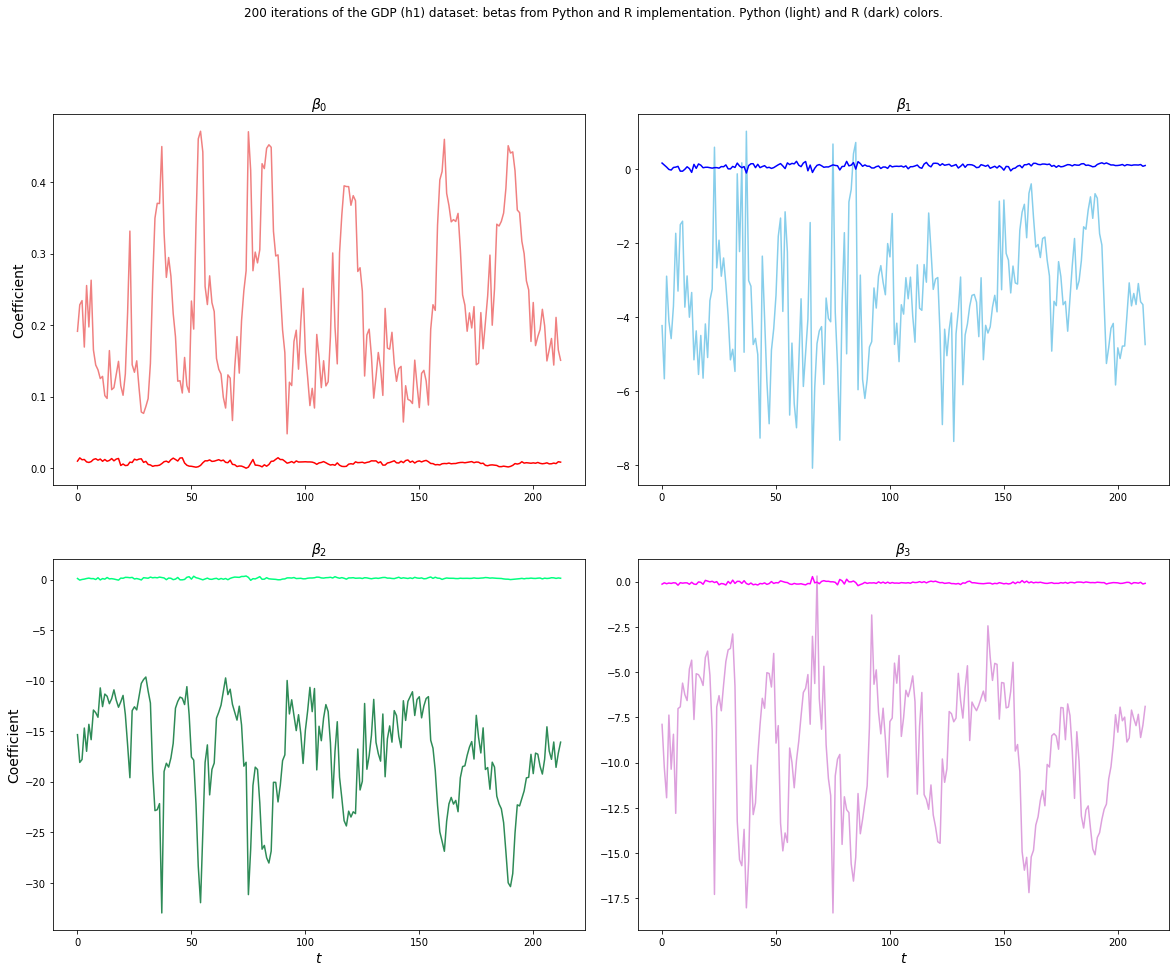

In [71]:
fig, ax =plt.subplots(nrows = 2, ncols = 2, gridspec_kw={"wspace": 0.1})

plt.suptitle(f"200 iterations of the GDP (h1) dataset: betas from Python and R implementation. Python (light) and R (dark) colors.", )

phils_preds_on = True
my_preds_on = True

plt.rcParams['figure.figsize'] = (20,15)
color_list_0 = ['lightcoral', 'skyblue', 'seagreen', 'plum']
color_list_1 = ['red', 'blue', 'springgreen', 'magenta']

if my_preds_on:
    ax[0, 0].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 0], color = color_list_0[0])
    ax[0, 1].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 1], color = color_list_0[1])
    ax[1, 0].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 2], color = color_list_0[2])
    ax[1, 1].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 3], color = color_list_0[3])

if phils_preds_on:
    ax[0, 0].plot(pd.DataFrame(phils_betas).iloc[:, 0], color_list_1[0])
    ax[0, 1].plot(pd.DataFrame(phils_betas).iloc[:, 1], color_list_1[1])
    ax[1, 0].plot(pd.DataFrame(phils_betas).iloc[:, 2], color_list_1[2])
    ax[1, 1].plot(pd.DataFrame(phils_betas).iloc[:, 3], color_list_1[3])

ax[0, 0].set_title(r"$\beta_0$", fontsize = 14)
ax[0, 1].set_title(r"$\beta_1$", fontsize = 14)
ax[1, 0].set_title(r"$\beta_2$", fontsize = 14)
ax[1, 1].set_title(r"$\beta_3$", fontsize = 14)

ax[1, 0].set_xlabel(r"$t$", fontsize = 14)
ax[1, 1].set_xlabel(r"$t$", fontsize = 14)

ax[0, 0].set_ylabel("Coefficient", fontsize = 14)
ax[1, 0].set_ylabel("Coefficient", fontsize = 14)

In [72]:
my_preds.columns = np.arange(0, len(my_preds.columns))

In [73]:
phils_preds

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50
1,0.011421,0.006737,0.008523,0.006408,0.007856,0.012491,0.011044,0.011835,0.007823,0.008884,...,0.010032,0.005726,0.005811,0.012125,0.006474,0.004877,0.008704,0.006167,0.005137,0.013309
2,0.010909,0.004453,0.004461,0.012586,0.011721,0.011029,0.010079,0.011596,0.011339,0.011135,...,0.012380,0.013682,0.010475,0.011392,0.010911,0.011525,0.002984,0.006744,0.010530,0.012068
3,0.015562,0.007286,0.007143,0.012574,0.010528,0.011813,0.011325,0.008495,0.008462,0.009920,...,0.008647,0.006481,0.006956,0.004511,0.009650,0.006999,0.008298,0.006362,0.007569,0.014198
4,0.010084,0.006218,0.008249,0.007834,0.009449,0.009393,0.012577,0.009852,0.010767,0.007316,...,0.009115,0.005911,0.007397,0.008196,0.005430,0.006617,0.008626,0.003853,0.007032,0.008574
5,0.005728,0.004531,0.003850,0.004894,0.009783,0.014712,0.008053,0.008690,0.004941,0.010142,...,0.006625,0.006148,0.007486,0.008862,0.008705,0.007358,0.009348,0.008825,0.015854,0.011277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.003590,0.006129,0.005273,0.009317,0.011019,0.009938,0.006152,0.006335,0.006069,0.009239,...,0.007456,-0.003602,0.004600,-0.000640,-0.002825,0.005190,0.010010,0.005196,0.006768,0.012606
197,0.007646,0.006323,0.011496,0.006158,0.015601,0.012224,0.012018,0.008137,0.007422,0.013407,...,0.007154,0.005771,0.004933,0.007857,0.008646,0.005299,0.003449,0.003430,0.009748,0.015702
198,0.006256,0.005750,0.008874,0.007817,0.016003,0.006287,0.012346,0.005888,0.003623,0.013569,...,0.003862,0.008286,0.000927,0.004272,0.006088,0.004461,0.007838,0.002529,0.001719,0.007066
199,0.011227,0.009235,0.011315,0.008860,0.011597,0.012277,0.011034,0.009138,0.009687,0.011518,...,0.009179,0.008472,0.009804,0.009265,0.010925,0.010378,0.011122,0.008361,0.012305,0.009212


Text(0, 0.5, 'Ensemble Predictions')

Text(0.5, 0, '$t$')

Text(0.5, 1.0, '200 iterations of GDP (h1) dataset: R versus Python implementation, average of forecasts')

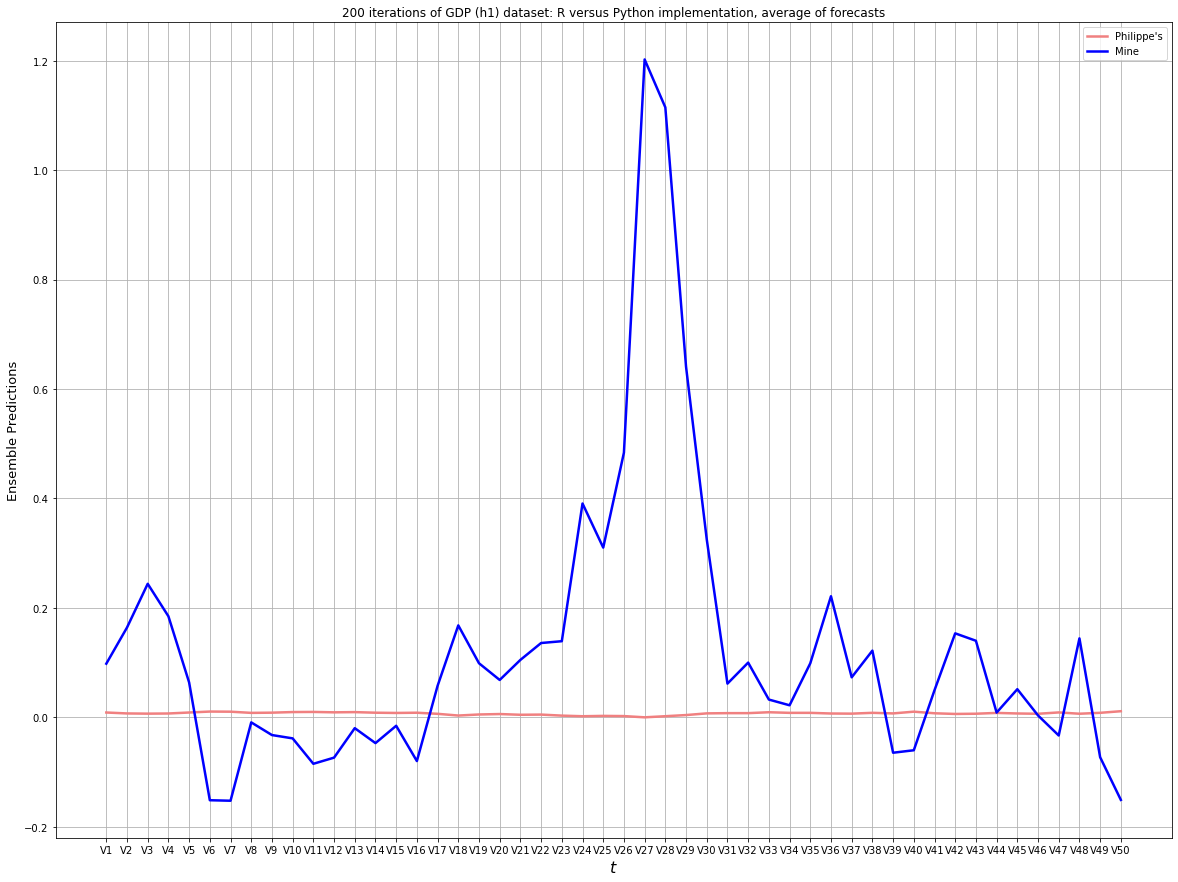

In [74]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 8)
ax.plot(phils_preds.mean(axis = 0), color = 'lightcoral', linewidth = 2.5, label = "Philippe's")

ax.plot(my_preds.mean(axis = 0), color = 'blue', linewidth = 2.5, label = "Mine")

# ax.plot(y, label = 'actual', color = 'magenta', linewidth = 2.5)
ax.legend()
ax.set_ylabel("Ensemble Predictions", fontsize = 13)
ax.grid()
ax.set_xlabel(r"$t$", fontsize = 16)
ax.set_title("200 iterations of GDP (h1) dataset: R versus Python implementation, average of forecasts")
# ax.plot(y, color = 'green', linewidth = 3)